In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
k = 5             # number of arms
T = 1000          # horizon
N = 20            # explore rounds
user_types = ("female over 25", "male over 25" , "male under 25", "female under 25")  # possible different types of users

# click probabilities
true_click_probs = np.array([
    [0.8, 0.6, 0.5, 0.4, 0.2],      # female over 25
    [0.2, 0.4, 0.5, 0.6, 0.8],      # male over 25
    [0.2, 0.4, 0.8, 0.6, 0.5],      # male under 25
    [0.2, 0.4, 0.8, 0.6, 0.5]       # female under 25 (similar preferences)
    ])
best_article_list = [np.amax(us) for us in true_click_probs]

In [3]:
bandit_score = np.zeros((len(user_types),k))      # total score of each arm for first N rounds
pulls = np.zeros((k,))                            # num of arm pulls
inst_score = np.zeros((len(user_types),T))        # reward for round t
best_score = np.zeros((len(user_types),T))        # cumulative reward of best arm for round t
alg_score = np.zeros((len(user_types),T))         # cumulative reward for round t
regret =  np.zeros((len(user_types),T))           # regret for round t

In [4]:
count = 0
for user in range(len(user_types)):
    for i in range(N):
        for j in range(k): # j -> current arm (article)
            count+=1
            current_user_chances = true_click_probs[user]
        
            #print(f"Current User: {user} ({user_types[user]}) with chances {user} with j : {j}")
        
            score = np.random.binomial(1,p=current_user_chances[j])  #get a reward for arm j
            #print(f'{user}|{j} {score}')
            inst_score[user][i*k+j] = score  # record reward of algorithm (during explore) at that instant has to change sakdpkspodkspkdask
            bandit_score[user][j] += score   # update the total score (during explore) of arm j
            #print(bandit_score)
print(count)

for i, user in enumerate(user_types):
  print(f'{user} with index : {i}')
  for j in range(k):
    print(f'article = {j}: true mean = {true_click_probs[i][j]} : sample mean = {bandit_score[i][j]/N}')
  print()

# articles = [np.argmax(x/N) for x in bandit_score]
articles = []
for i, user in enumerate(user_types):
  article = np.argmax(bandit_score[i]/N)  #get id of best arm (during explore)
  articles.append(article)
  print(f'For {user} the best article is: {article}')

400
female over 25 with index : 0
article = 0: true mean = 0.8 : sample mean = 0.8
article = 1: true mean = 0.6 : sample mean = 0.8
article = 2: true mean = 0.5 : sample mean = 0.4
article = 3: true mean = 0.4 : sample mean = 0.3
article = 4: true mean = 0.2 : sample mean = 0.25

male over 25 with index : 1
article = 0: true mean = 0.2 : sample mean = 0.2
article = 1: true mean = 0.4 : sample mean = 0.4
article = 2: true mean = 0.5 : sample mean = 0.6
article = 3: true mean = 0.6 : sample mean = 0.45
article = 4: true mean = 0.8 : sample mean = 0.7

male under 25 with index : 2
article = 0: true mean = 0.2 : sample mean = 0.3
article = 1: true mean = 0.4 : sample mean = 0.45
article = 2: true mean = 0.8 : sample mean = 0.75
article = 3: true mean = 0.6 : sample mean = 0.7
article = 4: true mean = 0.5 : sample mean = 0.6

female under 25 with index : 3
article = 0: true mean = 0.2 : sample mean = 0.05
article = 1: true mean = 0.4 : sample mean = 0.2
article = 2: true mean = 0.8 : sample

In [5]:
# After exploration rounds = N*K*U play the best "arm", show the best article for specific user.
for i in range(N*k*len(user_types),T):
    current_user = np.random.randint(len(user_types))
    current_user_chances = true_click_probs[current_user]
    article = articles[current_user]
    inst_score[current_user][i] = np.random.binomial(1,p=current_user_chances[article])  #play best arm for the remainder of the horizon


In [6]:
for i in range(T):
    current_user = np.random.randint(len(user_types))
    if i > 0:
        best_score[current_user][i] = best_score[current_user][i-1] + best_article_list[current_user] # vector keeping track of t*optimal reward (cummulative reward)
    else:
        best_score[current_user][i] = best_article_list[current_user]
  
    if i > 0: 
        alg_score[current_user][i] = alg_score[current_user][i-1] + inst_score[current_user][i] #vector keeping track of cummulative explore-then-eploit reward at all times 
    else:
        alg_score[current_user][i] = inst_score[current_user][i]
    
    regret[current_user][i] = (best_score[current_user][i] - alg_score[current_user][i])/(i+1)  #regret per iteration at round t


0
1
2
3


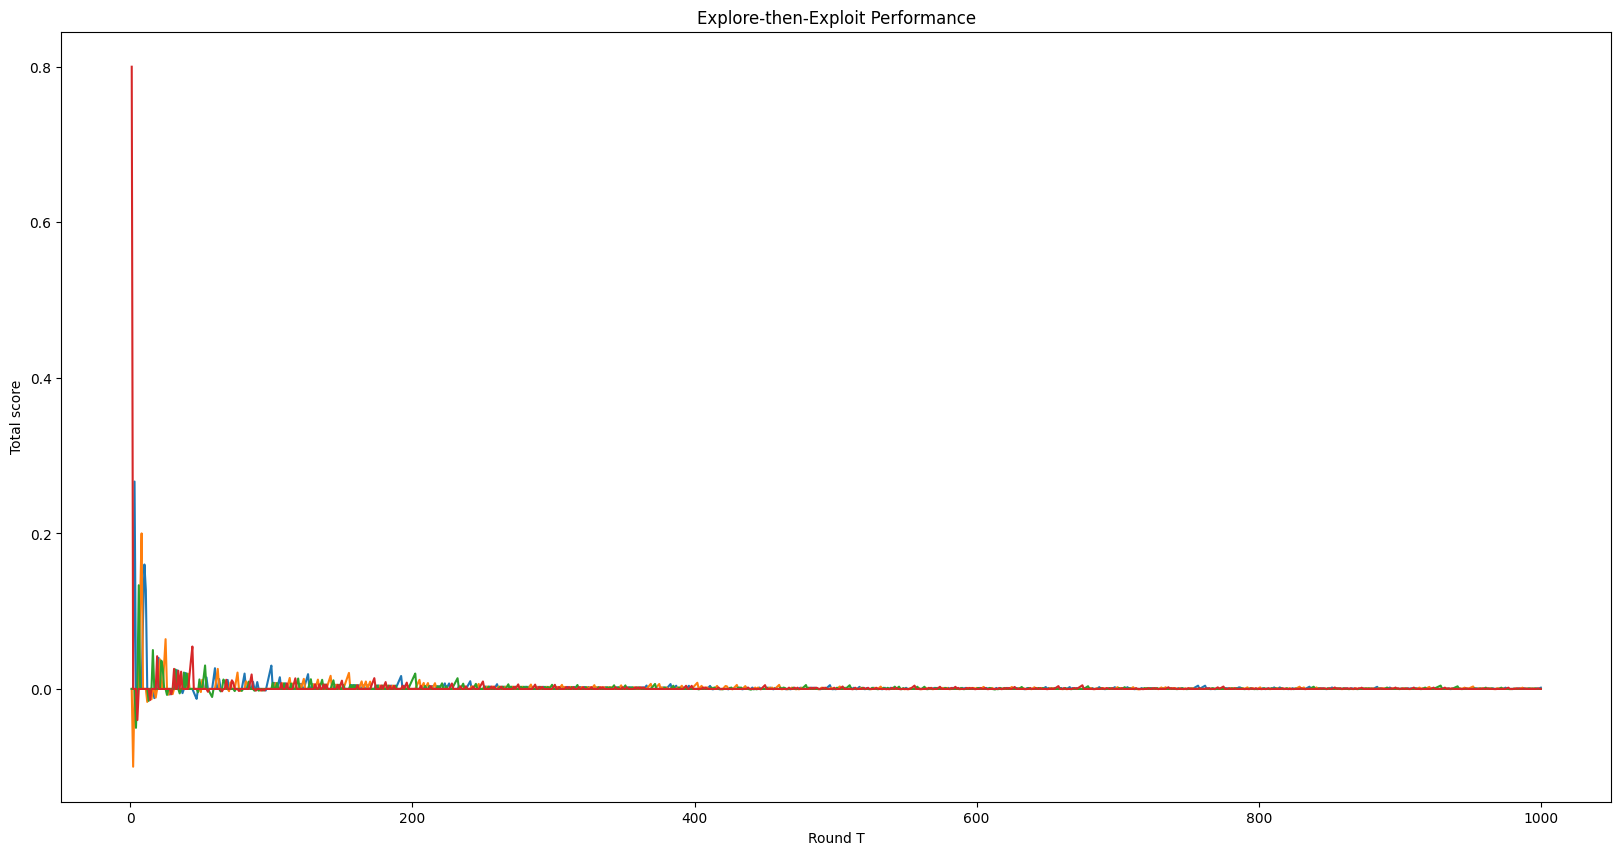

In [7]:
plt.figure(figsize=(20, 10))
plt.title("Explore-then-Exploit Performance") 
plt.xlabel("Round T") 
plt.ylabel("Total score") 
for current_user in range(len(user_types)):
    print(current_user)
    plt.plot(np.arange(1,T+1),regret[current_user])

plt.show()